In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from keras.models import Sequential #Sequential 딥러닝 뉴런 레이어를 쌓기 위한, 큰 프레임을 만들기 위한 'Sequential 틀 객체'

In [4]:
from keras.layers.core import Dense, Dropout, Activation
#각 레이어에 해당하는 객체는 Dense라는 객체임
#Dropout 객체는 오버피팅을 피하기 위한 '가지치기' 객체임
#Activation : 각 레이어마다, 다음 레이어에 값과 가중치를 함께 정리해서 넘겨야 한다.
#값과 가중치를 판단하는 처리 방법을 Activation에 적용하게 됨 
#비선형인 경우 확률을 가지고 판단을 하게 되는데, '시그모이드(=이진분류, 정답이 2개로 나뉘는것)', 'RELU(=다중분류, 정답이 여러개)'
#확실한 결과(1/0)는 선형으로 -> MSE
#MSE는 연속적 데이터나 결과를 시계열로, (소수점등)을 면적으로 구하는 방법이야
#SVC는 머신러닝에서 분류하는데 사용하는 것인데, 얘는 면적으로 구하는것이 아니라, 직선간의 거리로 구하는 것임 
#그래서, MSE는 딥러닝 '회귀'로 면적을 구하는 것이고, SVC는 분류하는 데 사용하는 머신러닝

In [5]:
from keras.optimizers import Adam #ADAM 
#딥러닝으로 학습시, 얼마나 학습해 나갈 것 인가를 지정 : optimizer
#SGD :Stochastic Gradient Descent : 확률론(=주식흐름 예가추측을 하듯) 많은 양을 경사하강법으로 내려가면서 기울기를 구하는 방법(=기울기를 구하는 것은 결국 점선위의 값을 예측을 하는 것)
#RMSProp : 세세하게 한번씩 학습률을 결정하는 방법
#Adam : 구간에 따라 학습률을 결정하는 방법

In [6]:
from keras.utils import np_utils
# 딥러닝은 항상 '명목형'인 데이터는 원핫인코딩을 해주어야 한다.
# to_categorical() 원핫인코딩을 해주는 함수
#원핫인코딩 : 컴퓨터는 숫자를 높고/낮음으로 구분하기 때문에, 1,2,3 중에 해당되는 것만 1,0,0 으로 처리해서 분류화 혹은 값을 주는 인코딩을 주는 것이다.
#ex) 상위 10%는 a, 상위 30%는 b, 상위 50%는 c라고 할때, 상위 10%만을 해당되는 것을 표현할려면 a=1 나머지는 0,
#ex) to_categorical은 알아서 원핫인코딩을 해줌

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #튜플 데이터 -> 리턴  

11493376/11490434 [==============================] - 2s 0us/step


In [8]:
X_train.shape #행 28, 열 28개 6만개 데이터

(60000, 28, 28)

In [9]:
y_train #판별한 결과가 들어가있음

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
y_test.shape

(10000,)

In [13]:
y_test #원핫인코딩 해줘야해.. 만약 진짜 숫자 -> 몸무게 같은 것은 원핫인코딩을 해줄필요가 없음 // 그러나, 맞춰야 할 데이터가 명목형이 아닐 경우는 원핫인코딩을 해줘야함

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
#이미지 파일은 한 이미지 파일당 2차원 배열 하나로 만들어져있음
#A.I에서 분석데이터는 1차원만 허용
#reshape() 함수로 2차원 데이터를 1차원 데이터로 변경해줌
X_train = X_train.reshape(60000, 784).astype('float32') #2차원을 1차원 배열로 만든다.
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
X_test = X_test.reshape(10000, 784).astype('float32') #2차원을 1차원 배열로 만든다.
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
X_train[0] #숫자 이미지가, 0~255 까지 색칠로 칠해진 값들이 들어가있음

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [17]:
#정규화 시켜줌, 수치를 적게해줌 
X_train /= 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
X_test /= 255

In [20]:
y_train = np_utils.to_categorical(y_train, 10) #원핫인코딩화

In [21]:
y_test = np_utils.to_categorical(y_test, 10) #원핫인코딩화 -> 명목형으로 원핫인코딩화시킴

In [22]:
y_train[0] #5에 1이 들어와있음. 5임을 알 수 있음

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
model = Sequential() #딥러닝의 프레임 역할을 하는 객체

In [25]:
#RELU -> 다중분류로 하는 데 가장 좋은 방법론
#Activation : 뉴런 레이어의 학습을 판단하는 근거 방법
#Dense : 레이어를 밀집시켜 넣는다.
#RELU -> 다중분류로 하는 데 가장 좋은 방법론
#Activation : RELU는 학습한걸 판단하는 것이다. 
#Dense 는 히든레이어 , input_shape은 784(개로 노드를 넣어서 학습하지만, 최종 레이어는 512로 만들어줘)
#다중선형은 relu로 판단, 그러나, 결과는 softmax로 판단해라.
#이미 레이어가 Dense로 들어간 순간 학습을 함., 
#softmax = 로지스틱함수를 활용하여 딥러닝 학습화된 결과를 판단함.
#batch size = 묶어주는 개념, 딥러닝 학습 레이어의 가중치의 높고낮음을 가르는 경우임

In [27]:
#입력레이어
model.add(Dense(512, input_shape=(784,))) #레이어를 넣어줌

In [28]:
model.add(Activation('relu')) #0일때는 이거고, 1일때는 이거고 배열들의 0과 1을 판단해서 뉴런 네트워크의 가중치를 판단하는 함수

In [30]:
model.add(Dropout(0.2)) #오버피팅을 방지하기 위해, 20%를 드랍시킨다.

In [33]:
#히든레이어
model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.2))

In [34]:
#출력층
model.add(Dense(10))
model.add(Activation('softmax'))

In [37]:
#위에는 학습을 하는것인데, compile중
model.compile(loss='categorical_crossentropy', #loss는 면적손실을 줄이면서 나간다는 뜻인듯
              optimizer=Adam(),
              metrics=['accuracy']
              ) #optimizer는 학습률 계산, Adam은 경사하강법에서 내려오는 방식임
              #metrics는 행렬 -> Accuracy를 계속 계산해나가면서 학습하겠다.

In [42]:
#훈련하기
hist = model.fit(X_train, y_train,
                 batch_size=128, #batch 사이즈는 epoch를 돌릴때, 100개씩 batch_size를 넘기면서 돌린다는 뜻인듯? 자세한건 구글링(batch = 데이터셋의 묶음, 100개정도씩 끊어서 )
                 epochs=5,
                 verbose=1,
                 validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0864 - accuracy: 0.9746 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 2/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.0658 - accuracy: 0.9797 - val_loss: 0.0700 - val_accuracy: 0.9798
Epoch 3/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.0617 - val_accuracy: 0.9824
Epoch 4/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 5/5
60000/60000 [==============================] - 13s 215us/step - loss: 0.0549 - accuracy: 0.9825 - val_loss: 0.0739 - val_accuracy: 0.9799


In [40]:
#테스트데이터로 정확도 판단
score = model.evaluate(X_test, y_test, verbose=1) #verbose는 0과 1 번에 따라 출력을 어떠헥 해줄것인가ㅏ, 출력양식

10000/10000 [==============================] - 1s 88us/step


In [41]:
score

[0.14255783894639462, 0.9581999778747559]

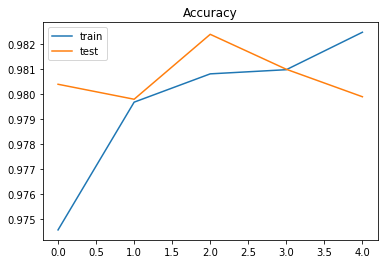

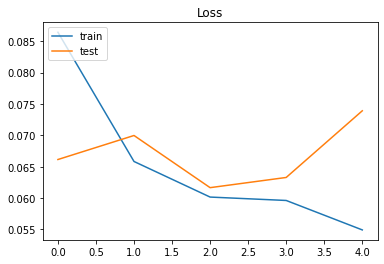

In [44]:
import matplotlib.pyplot as plt
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()